In [1]:
import pandas as pd

import numpy as np

import scipy.stats as stats

import seaborn as sns

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

## Loading data from a csv file named train.csv

In [2]:
df = pd.read_csv("train.csv")

df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.shape

(100000, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


## Data Summary

ID: a unique identification of an entry

Customer_ID: a unique identification of a person

Month: month of the year

Name: name of a person

Age: age of the person

SSN: social security number of a person

Occupation: occupation of the person

Annual_Income: annual income of the person

Monthly_Inhand_Salary: monthly base salary of a person

Num_Bank_Accounts: number of bank accounts a person holds

Num_Credit_Card: number of other credit cards held by a person

Interest_Rate: interest rate on credit card

Num_of_Loan: number of loans taken from the bank

Type_of_Loan: types of loan taken by a person

Delay_from_due_date: average number of days delayed from the payment date

Num_of_Delayed_Payment: average number of payments delayed by a person

Changed_Credit_Limit: percentage change in credit card limit

Num_Credit_Inquiries: number of credit card inquiries

Credit_Mix: classification of the mix of credits

Outstanding_Debt: remaining debt to be paid

Credit_Utilization_Ratio: utilization ratio of credit card

Credit_History_Age: age of credit history of the person

Payment_of_Min_Amount: whether only the minimum amount was paid by the person

Total_EMI_per_month: monthly EMI payments

Amount_invested_monthly: monthly amount invested by the customer

Payment_Behaviour: payment behavior of the customer

Monthly_Balance: monthly balance amount of the customer

Credit_Score: bracket of credit score (Poor, Standard, Good) - Target

## Checking duplicated rows in the dataframe

In [6]:
df.duplicated().sum()

0

No duplicated rows were found

## Checking missing values

In [7]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Checking the values in the data whether they are valid or not

In [8]:
for i in df.columns:
    
    if df[i].dtype == type(object):
        
        print(i, end = ': ')
        
        print('\n', df[i].unique())
        
        print()

ID: 
 ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']

Customer_ID: 
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

Month: 
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

Name: 
 ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

Age: 
 ['23' '-500' '28_' ... '4808_' '2263' '1342']

SSN: 
 ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']

Occupation: 
 ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

Annual_Income: 
 ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

Num_of_Loan: 
 ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '110

## Handling strange values from the NaN values

In [9]:
def text_cleaning(data):
    
    if data is np.NaN or not isinstance(data, str):
        
        return data
    
    else:
        
        return str(data).strip('_ ,"')

In [10]:
df = df.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [12]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Fixing data type for some columns

In [13]:
def Month_Converter(x):
    
    if pd.notnull(x):
        
        num1 = int(x.split(' ')[0])
        
        num2 = int(x.split(' ')[3])
      
        return (num1*12) + num2
    
    else:
        
        return x

In [14]:
df['ID'] = df.ID.apply(lambda x: int(x, 16))

df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))

df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month

df['Age'] = df.Age.astype(int) 

df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)

df['Annual_Income'] = df.Annual_Income.astype(float)

df['Num_of_Loan'] = df.Num_of_Loan.astype(int) 

df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)

df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)

df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)

df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)

df['Monthly_Balance'] = df.Monthly_Balance.astype(float)

df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int32  
 5   SSN                       94428 non-null   float64
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              88592 non-null   ob

In [16]:
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,-500,821000265.0,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good


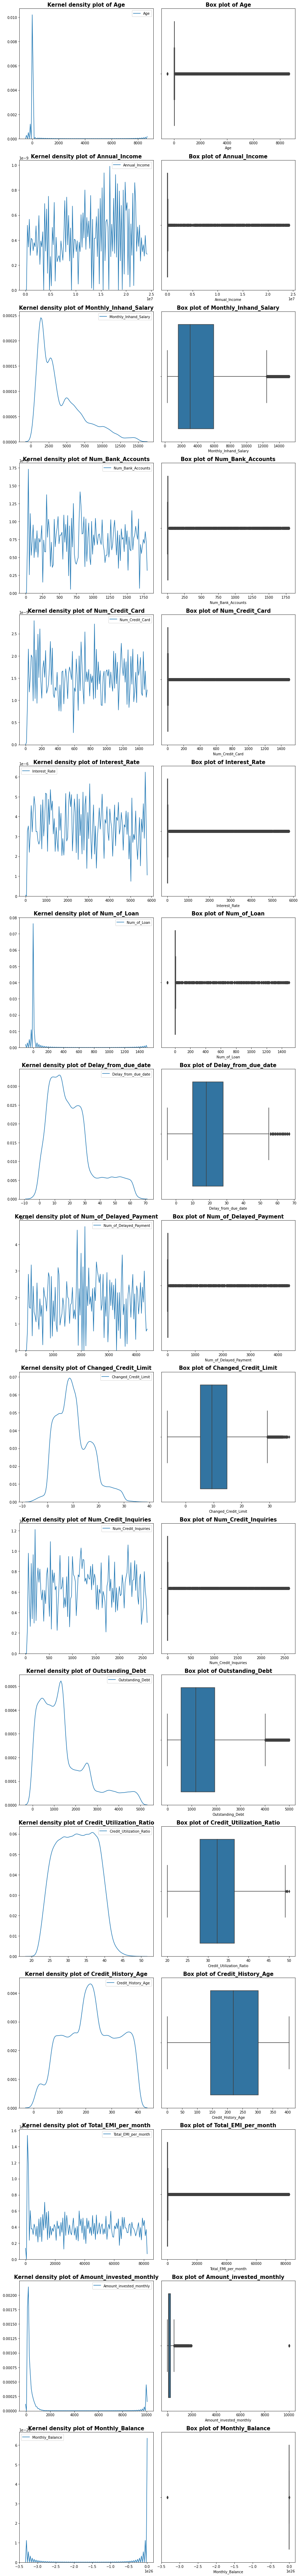

In [17]:
def plot_features(features, df):
    
    num_features = len(features)
    
    fig, axes = plt.subplots(num_features, 2, figsize=(12, 6*num_features))
    
    for i, feature in enumerate(features):
        
        sns.kdeplot(df[feature], ax=axes[i, 0])
        
        axes[i, 0].set_title(f"Kernel density plot of {feature}", fontsize=15, weight='bold')
        
        sns.boxplot(df[feature], ax=axes[i, 1])
        
        axes[i, 1].set_title(f"Box plot of {feature}", fontsize=15, weight='bold')
    
    plt.tight_layout()
    
    plt.show()

selected_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate'
          ,'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries'
          , 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month'
         , 'Amount_invested_monthly', 'Monthly_Balance']

plot_features(selected_columns, df)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5.634000e+03,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1.006000e+03,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000e+00,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,1.106497e+02,6.862447e+02,-5.000000e+02,2.400000e+01,3.300000e+01,4.200000e+01,8.698000e+03
SSN,94428.0,5.003688e+08,2.906500e+08,8.134900e+04,2.452217e+08,5.003180e+08,7.557849e+08,9.999934e+08
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,1.945750e+04,3.757861e+04,7.279092e+04,2.419806e+07
Monthly_Inhand_Salary,84998.0,4.194171e+03,3.183686e+03,3.036454e+02,1.625568e+03,3.093745e+03,5.957448e+03,1.520463e+04
Num_Bank_Accounts,100000.0,1.709128e+01,1.174048e+02,-1.000000e+00,3.000000e+00,6.000000e+00,7.000000e+00,1.798000e+03
Num_Credit_Card,100000.0,2.247443e+01,1.290574e+02,0.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,1.499000e+03
Interest_Rate,100000.0,7.246604e+01,4.664226e+02,1.000000e+00,8.000000e+00,1.300000e+01,2.000000e+01,5.797000e+03


## Detecting NaN Values and Filling by Customer_ID Group for Categorical columns

Upon reviewing our dataset, it has come to my attention that it contains numerous outliers and instances with erroneous data. Before proceeding with our modeling efforts, it is imperative that we address these issues by thoroughly cleaning each of our features. This section of our project will require significant attention as we meticulously clean and preprocess each feature to ensure the integrity of our data and the effectiveness of our model.

In [19]:
def Reassign_Group_Mode(df, groupby, column, inplace=True):
    
    def make_NaN_and_fill_mode(df, groupby, column):
        
        # Replace None with np.NaN
        df[column].replace([None], np.NaN, inplace=True)
        
        # Function to apply mode, handling empty series
        def mode_or_original(series):
            if series.isna().all():
                
                return series
            
            mode_val = stats.mode(series.dropna())[0][0]
            
            return series.fillna(mode_val)

        # Apply mode to each group
        result = df.groupby(groupby)[column].transform(mode_or_original)

        return result

    if inplace:
        
        df[column] = make_NaN_and_fill_mode(df, groupby, column)
        
    else:
        
        df_copy = df.copy()
        
        df_copy[column] = make_NaN_and_fill_mode(df_copy, groupby, column)
        
        return df_copy

In [20]:
Reassign_Group_Mode(df, 'Customer_ID', 'Name')

Reassign_Group_Mode(df, 'Customer_ID', 'Occupation')

Reassign_Group_Mode(df, 'Customer_ID', 'Credit_Mix')

Reassign_Group_Mode(df, 'Customer_ID', 'Payment_Behaviour')

df['Type_of_Loan'][df['Type_of_Loan'].isin([np.NaN])] = 'Not Specified'

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       94428 non-null   float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

In [22]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,-500,821000265.0,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


## Filling NaN Values for Numeric Columns by using Group Min-Max

In [23]:
def Reassign_Group_Min_Max(df, groupby, column, inplace=True):
    
    # Calculate group-wise min and max based on mode
    def get_group_min_max(df, groupby, column):
        
        mode_series = df.groupby(groupby)[column].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.NaN)
        
        return mode_series.min(), mode_series.max()

    # Get minimum and maximum values across all groups
    group_min, group_max = get_group_min_max(df, groupby, column)

    # Function to replace out-of-range values with NaN and fill them
    def replace_and_fill(df, group_min, group_max):
        
        col = df[column].apply(lambda x: np.NaN if x < group_min or x > group_max else x)
        
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.NaN)
        
        return col.fillna(mode_by_group)

    if inplace:
        
        df[column] = replace_and_fill(df, group_min, group_max)
        
    else:
        
        df_copy = df.copy()
        
        df_copy[column] = replace_and_fill(df_copy, group_min, group_max)
        
        return df_copy

In [24]:
df.loc[df['Customer_ID'] == 3392]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,-500,821000265.0,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,270.0,No,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,271.0,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard


In [25]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.interpolate().bfill().ffill())

In [26]:
for col in ['Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate'
          ,'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries'
          , 'Customer_ID', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']:
    
    Reassign_Group_Min_Max(df, 'Customer_ID', col)

In [27]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x :abs (x))

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x :abs (x))

df['Delay_from_due_date'] = df['Delay_from_due_date'].apply(lambda x :abs (x))

df['Monthly_Balance'] = np.where(df['Monthly_Balance'] < 0, 0, df['Monthly_Balance'])

In [28]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(' and', '')

df = pd.concat((df, df['Type_of_Loan'].str.get_dummies(sep=', ')), axis=1)

In [29]:
# creating classes for our credit history age

df['Credit_History_labels'] = pd.cut(df['Credit_History_Age'], bins=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])

In [30]:
df["Age_Group"] = pd.cut(df.Age, bins=[14, 25, 30, 45, 55, 95], labels=["14-25", "25-30", "30-45", "45-55", "55-95"], right=False)

In [31]:
# creating a helper function to handle outliers

def process_outliers(feature):
    
    pct_25, pct_50, pct_75 = feature.quantile([0.25, 0.5, 0.75])
    
    IQR = pct_75 - pct_25
    
    lower_whisker = pct_25 - 1.5 * IQR
    
    upper_whisker = pct_75 + 1.5 * IQR
    
    return df[feature.between(lower_whisker, upper_whisker)]

In [32]:
df = process_outliers(df['Total_EMI_per_month'])

In [33]:
df['Amount_invested_monthly'] = np.where(df['Amount_invested_monthly'] > 1000, df.loc[(df['Amount_invested_monthly'] > 1000) & (df['Amount_invested_monthly'] < 10000)]['Amount_invested_monthly'].median(), df['Amount_invested_monthly'])

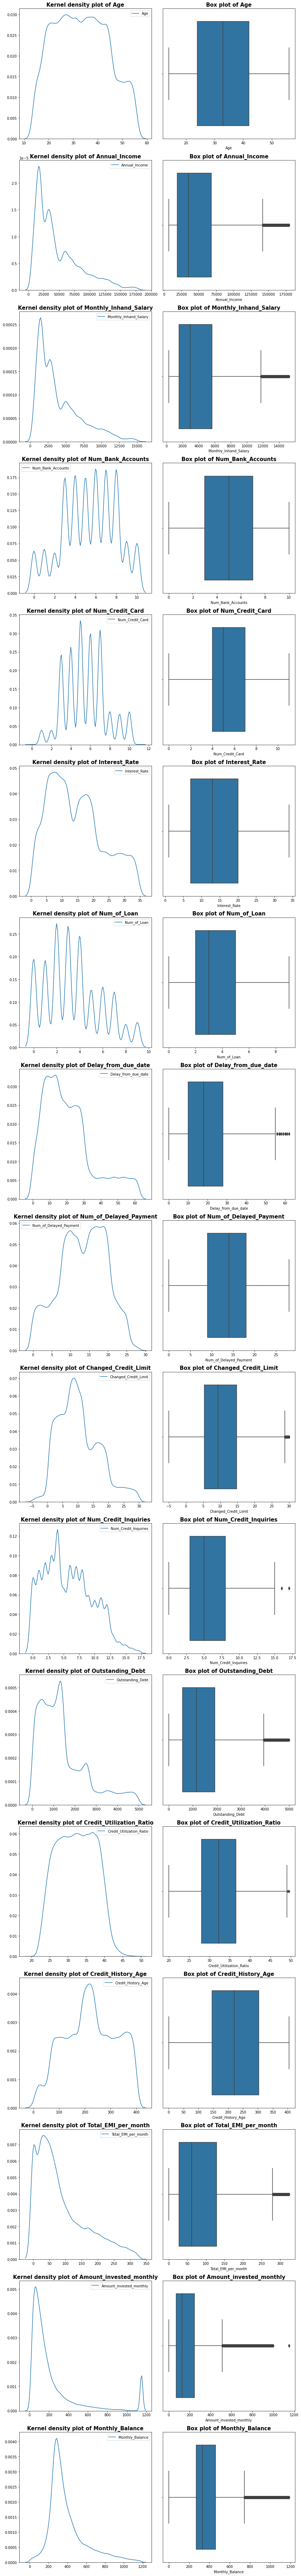

In [34]:
plot_features(selected_columns, df)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94948 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID                        94948 non-null  int64   
 1   Customer_ID               94948 non-null  int64   
 2   Month                     94948 non-null  int64   
 3   Name                      94948 non-null  object  
 4   Age                       94948 non-null  float64 
 5   SSN                       94948 non-null  float64 
 6   Occupation                94948 non-null  object  
 7   Annual_Income             94948 non-null  float64 
 8   Monthly_Inhand_Salary     94948 non-null  float64 
 9   Num_Bank_Accounts         94948 non-null  float64 
 10  Num_Credit_Card           94948 non-null  float64 
 11  Interest_Rate             94948 non-null  float64 
 12  Num_of_Loan               94948 non-null  float64 
 13  Type_of_Loan              94948 non-null  obje

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94948.0,8.075790e+04,4.326595e+04,5634.000000,4.331775e+04,8.082650e+04,1.181872e+05,1.556290e+05
Customer_ID,94948.0,2.593946e+04,1.434611e+04,1006.000000,1.361500e+04,2.566600e+04,3.838225e+04,5.099900e+04
Month,94948.0,4.478578e+00,2.291526e+00,1.000000,2.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00
Age,94948.0,3.336576e+01,1.077624e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,94948.0,5.005926e+08,2.905198e+08,81349.000000,2.451776e+08,5.009264e+08,7.557712e+08,9.999934e+08
Annual_Income,94948.0,4.810816e+04,3.680791e+04,7005.930000,1.896713e+04,3.541343e+04,6.807927e+04,1.793170e+05
Monthly_Inhand_Salary,94948.0,4.007146e+03,3.072216e+03,303.645417,1.588553e+03,2.959230e+03,5.649318e+03,1.520463e+04
Num_Bank_Accounts,94948.0,5.361377e+00,2.586082e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.000000e+01
Num_Credit_Card,94948.0,5.525130e+00,2.061109e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,94948.0,1.449029e+01,8.719781e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


## Dropping Irrelevant Columns

We are excluding the 'ID', 'Name', 'Customer ID', and 'SSN' columns from our dataset as we aim to build a credit score classifier that can be applied broadly. While retaining the 'Customer ID' feature could potentially improve the accuracy of our model, our objective is to create a classifier that is transferable across different customer profiles and branches. Thus, we have made the decision to remove these specific identifying features to ensure the generalizability of our model.

In [37]:
df.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], axis=1, inplace = True)

In [38]:
df.head(3)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_History_labels,Age_Group
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,...,1,0,1,0,0,0,1,0,Long,14-25
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1.0,...,1,0,1,0,0,0,1,0,Long,14-25
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,...,1,0,1,0,0,0,1,0,Long,14-25


In [39]:
df.to_csv("train_cleaned.csv", index = False)